In [1]:
# Test migration history reconstruction on Sanborn et. al. Melanoma data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)
from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
from src.util.plotting_util import PrintConfig

import matplotlib
import torch

SANBORN_DATA_DIR = os.path.join(repo_dir, 'src/data/sanborn_melanoma_2015')


09:49:06 INFO
NumExpr defaulting to 8 threads.


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:
def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    data = data_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    
    for adj_matrix, pruned_cluster_label_to_idx in data:
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)

        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}
        G = data_util.get_genetic_distance_tensor_from_adj_matrix(T, pruned_cluster_label_to_idx, "_")

        print(unique_sites)   
        primary_idx = unique_sites.index('primary')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=2.0, gen_dist=0.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=5)
        vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, G=G, ordered_sites=unique_sites, 
                                                    weights=weights, p=r, node_idx_to_label=idx_to_label, lr=0.1,
                                                    max_iter=200, batch_size=64, print_config=print_config,
                                                    custom_colors=custom_colors, primary="primary", 
                                                    weight_init_primary=True, lr_sched="step")


        

num trees: 1
['primary', 'parotid_gland', 'locoregional_1', 'locoregional_2']


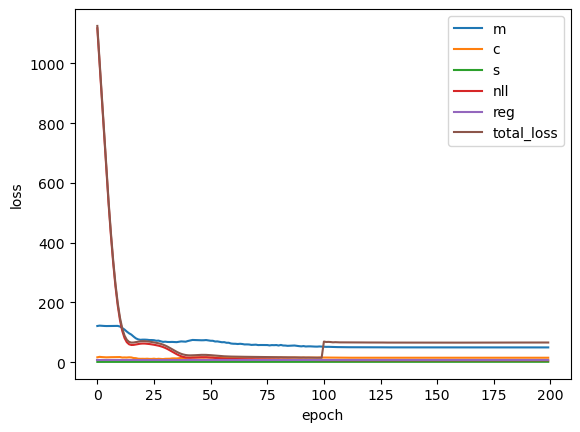

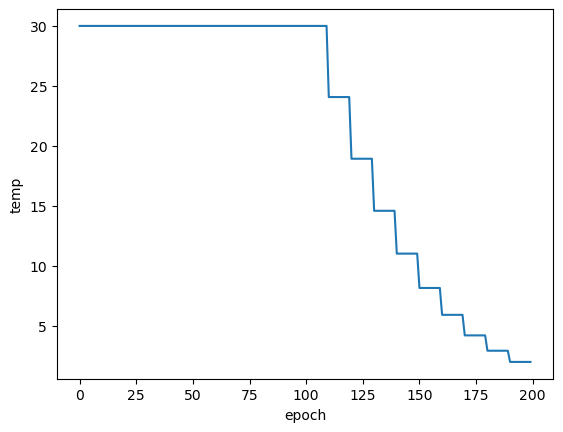

Time elapsed: 20.988676
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 6.394
Reg: 4.0
Loss: 70.394


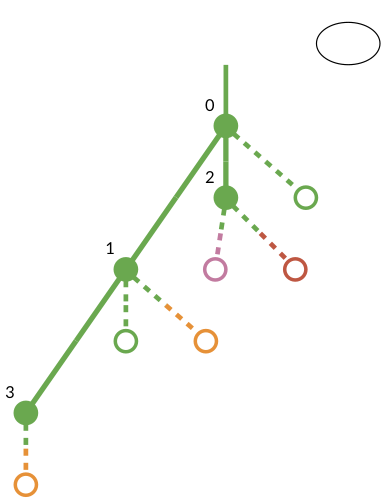

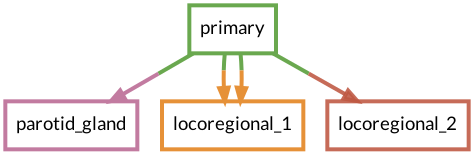

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 6.695
Reg: 4.0
Loss: 70.695


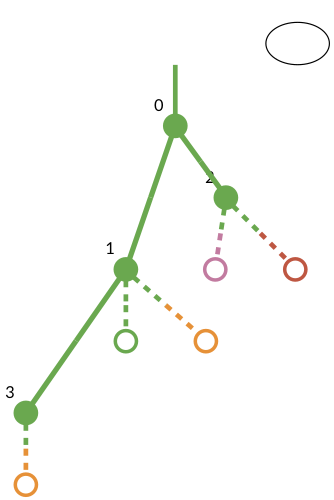

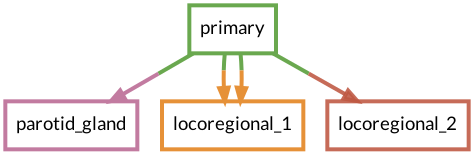

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 5.845
Reg: 4.0
Loss: 70.845


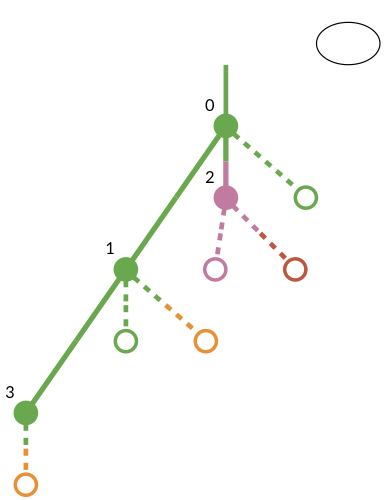

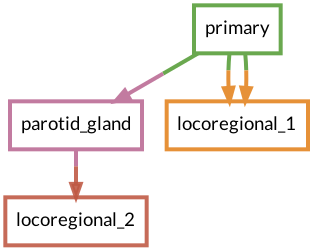

----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 5.765
Reg: 3.999999523162842
Loss: 79.765


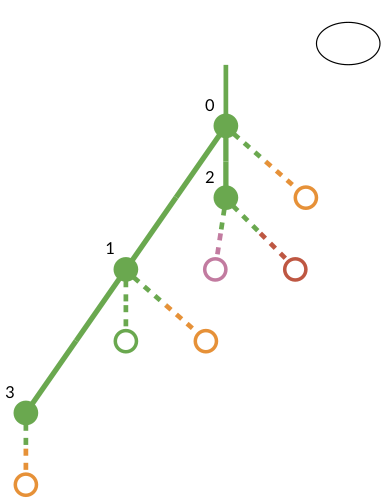

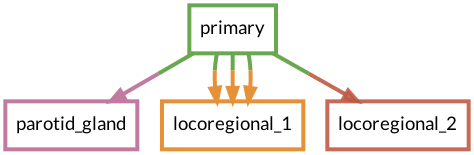

----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 5.966
Reg: 4.000000476837158
Loss: 79.966


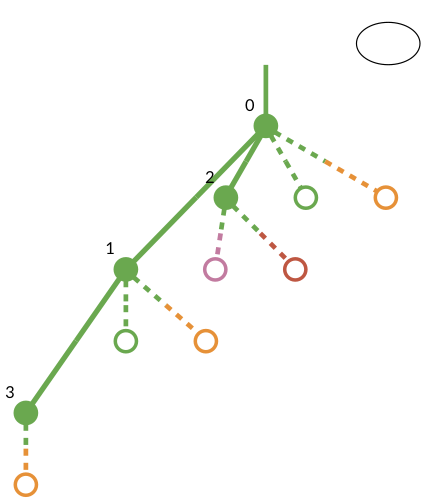

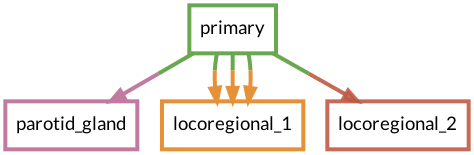

----------------------------------------------------------------------------------------------------



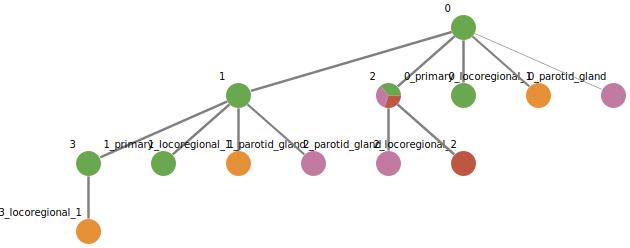

In [3]:
# Patient A
patient = "A"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'red',  'purple', 'darkorange',]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'locoregional_1', 'locoregional_2']


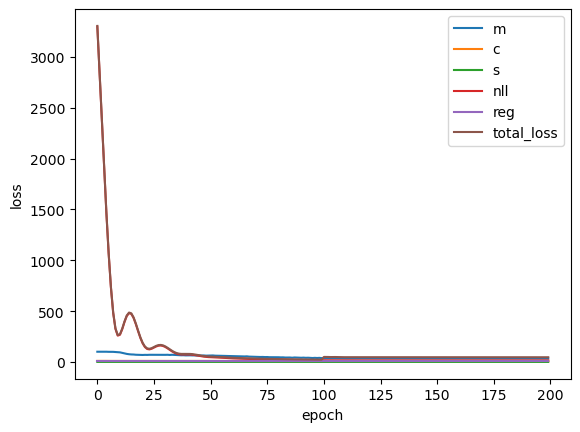

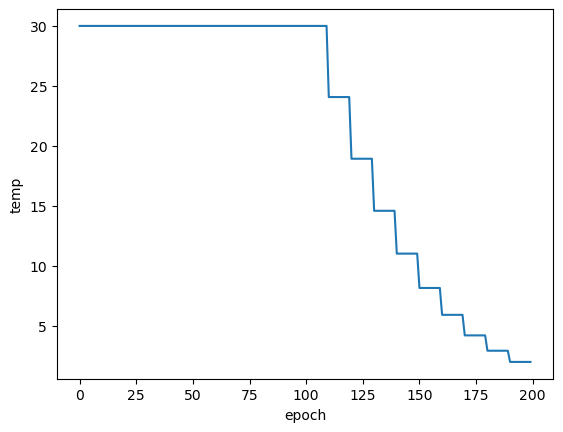

Time elapsed: 20.559857
**************************************** BEST TREE LABELING ****************************************

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 13.199
Reg: 3.0
Loss: 60.199


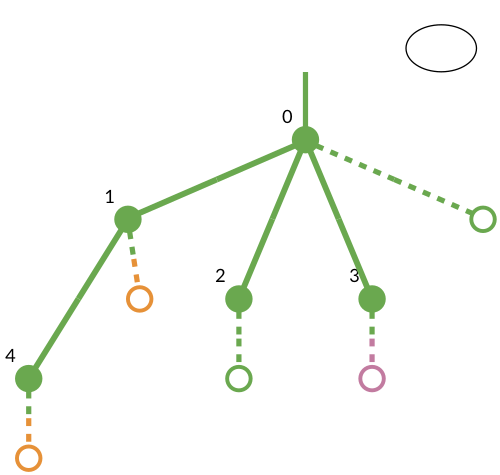

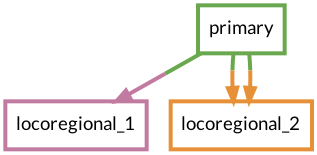

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 14.806
Reg: 3.000000238418579
Loss: 61.806


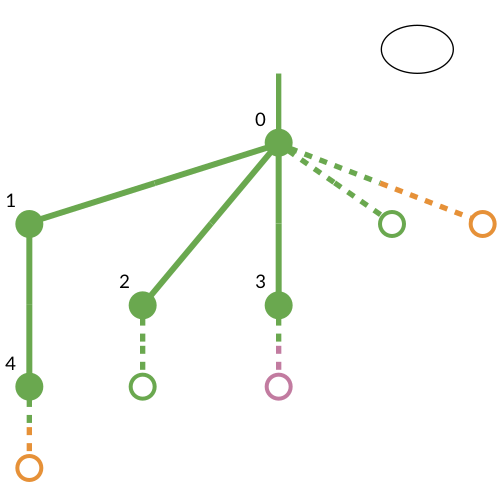

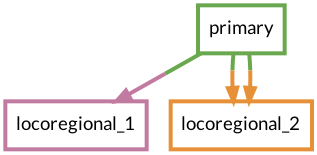

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 15.033
Reg: 3.0
Loss: 62.033


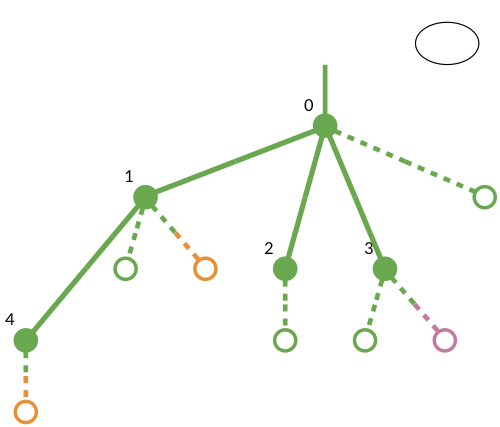

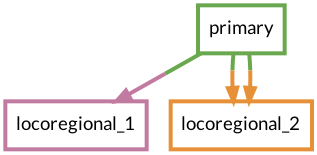

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 16.117
Reg: 3.0
Loss: 63.117


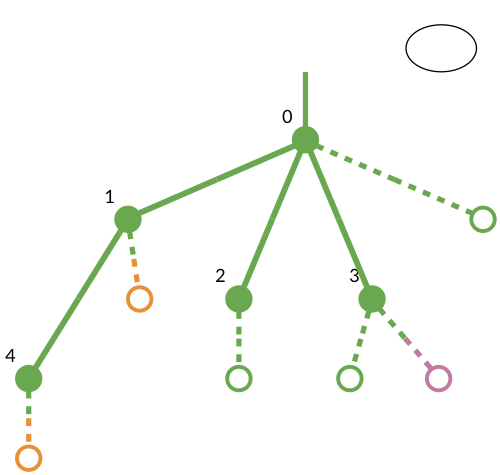

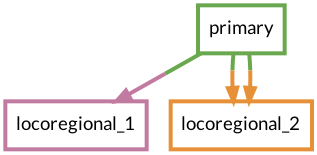

----------------------------------------------------------------------------------------------------

Migration number: 3.0
Comigration number: 2.0
Seeding site number: 1.0
Neg log likelihood: 16.159
Reg: 3.0
Loss: 63.159


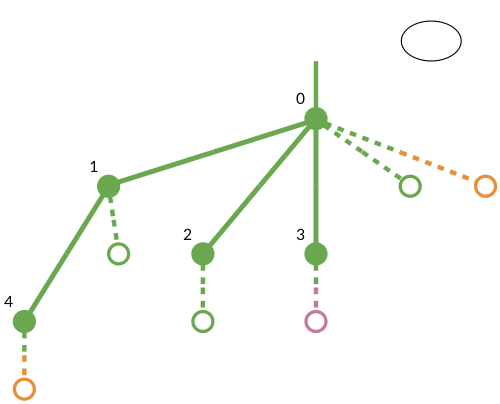

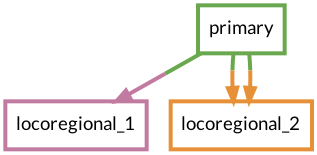

----------------------------------------------------------------------------------------------------



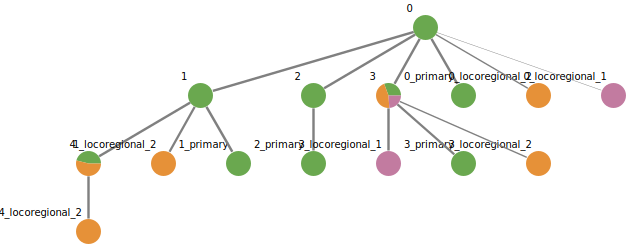

In [4]:
# Patient C
patient = "C"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)



num trees: 1
['primary', 'lymph_node', 'locoregional_1', 'locoregional_2']


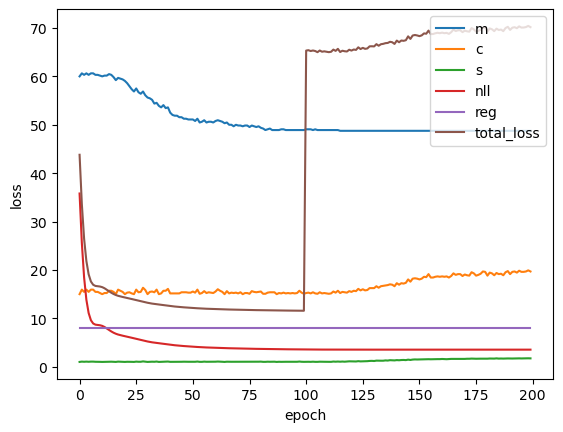

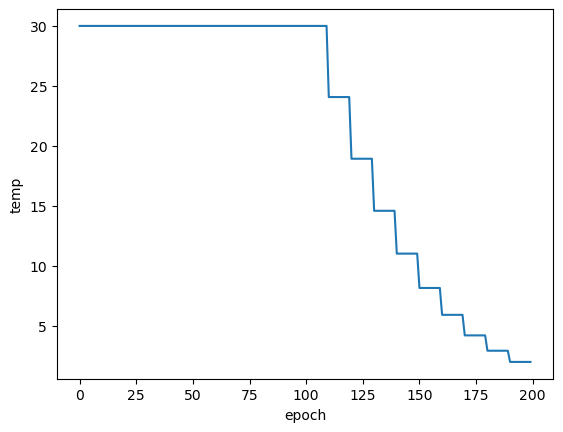

Time elapsed: 19.519917
**************************************** BEST TREE LABELING ****************************************

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.592
Reg: 4.000000476837158
Loss: 67.592


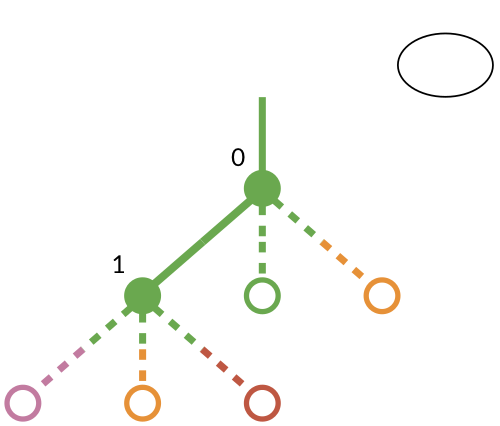

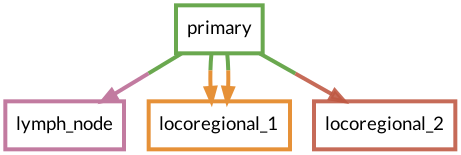

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.626
Reg: 4.0
Loss: 67.626


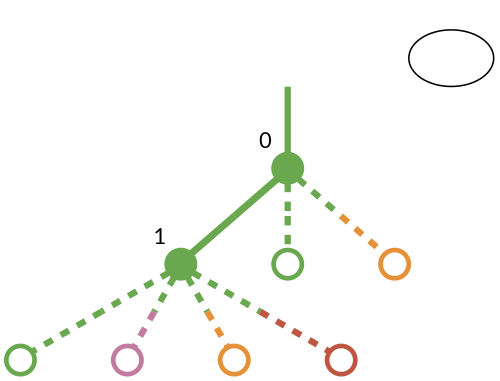

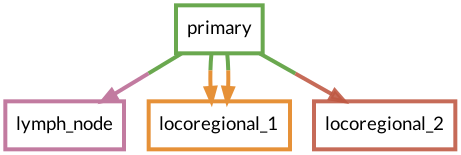

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 3.0
Seeding site number: 2.0
Neg log likelihood: 3.319
Reg: 4.0
Loss: 68.319


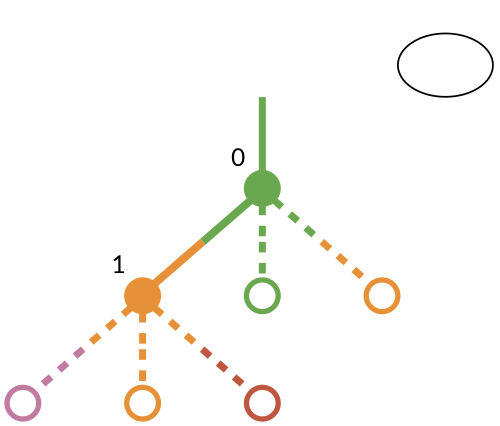

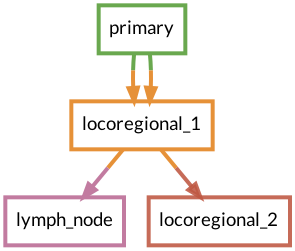

----------------------------------------------------------------------------------------------------

Migration number: 4.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.447
Reg: 3.999999761581421
Loss: 73.447


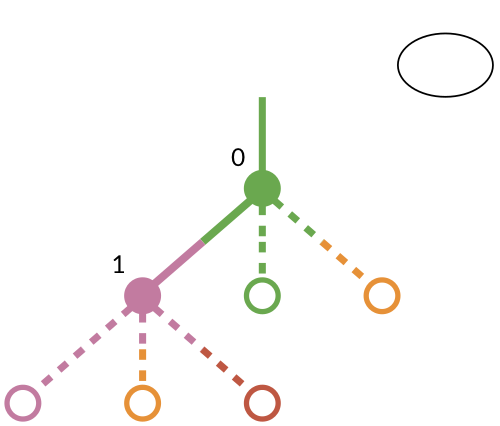

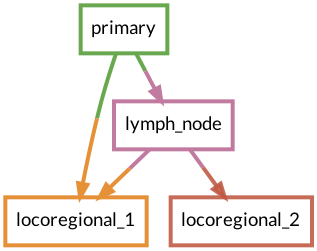

----------------------------------------------------------------------------------------------------

Migration number: 5.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 3.507
Reg: 4.0
Loss: 77.507


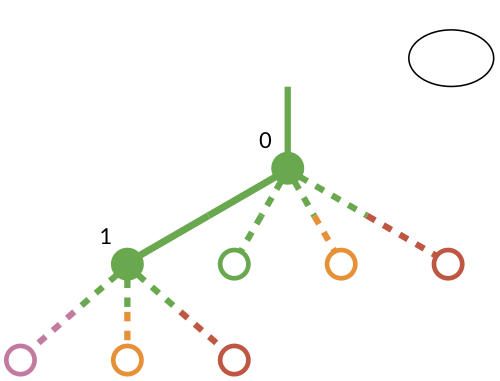

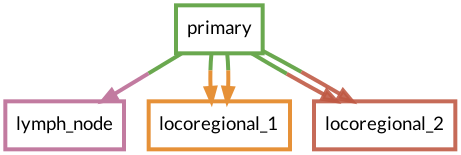

----------------------------------------------------------------------------------------------------



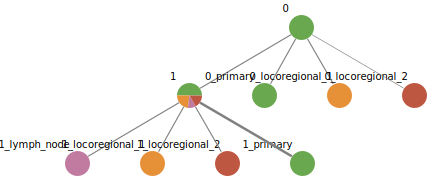

In [5]:
# Patient D
patient = "D"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'purple', 'darkorange', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)


num trees: 1
['primary', 'locoregional_1', 'locoregional_2', 'lymph_node', 'locoregional_3']


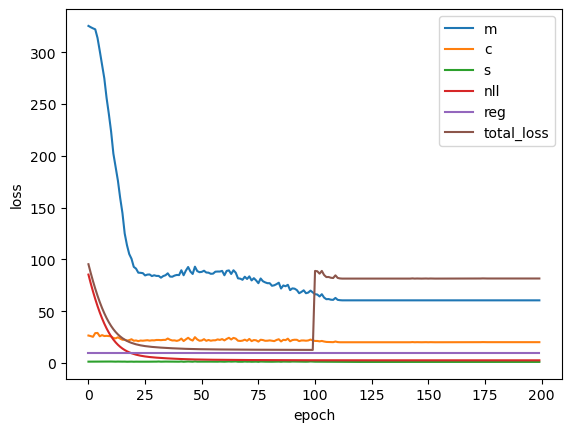

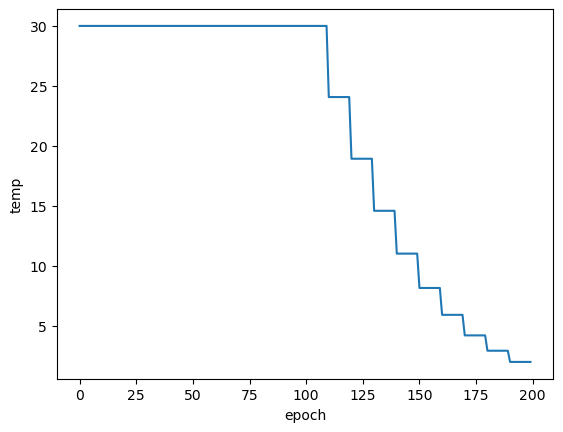

Time elapsed: 20.847615
**************************************** BEST TREE LABELING ****************************************

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.503
Reg: 5.0
Loss: 93.503


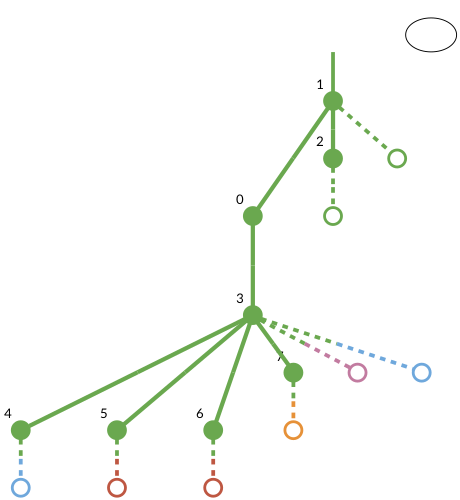

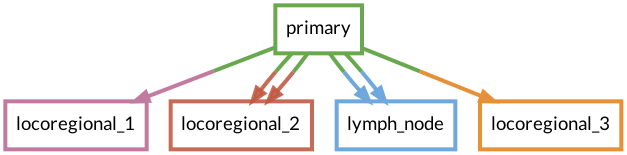

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.517
Reg: 4.999999523162842
Loss: 93.517


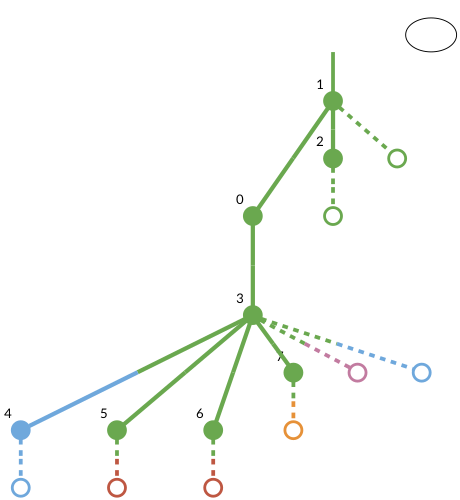

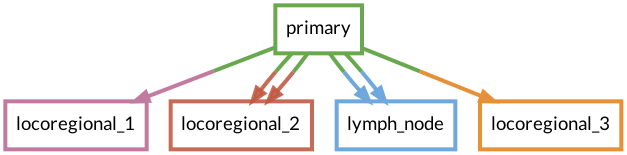

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.519
Reg: 5.0
Loss: 93.519


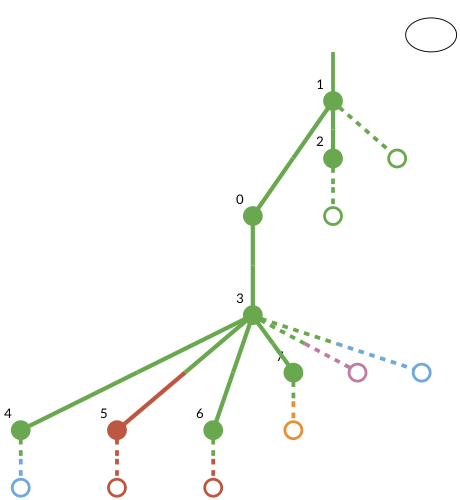

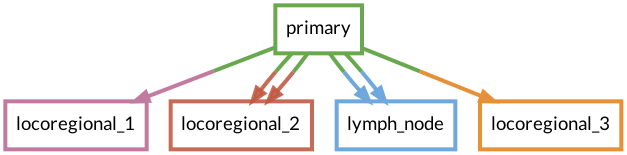

----------------------------------------------------------------------------------------------------

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.542
Reg: 5.0
Loss: 93.542


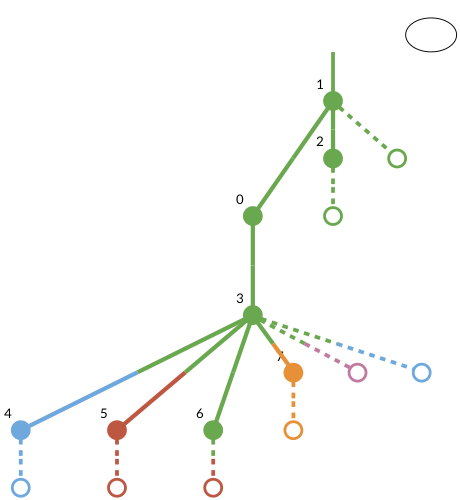

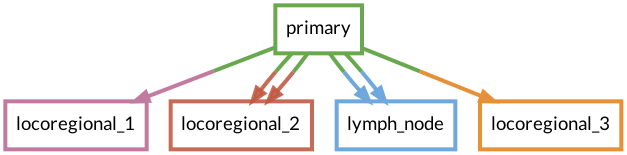

----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 2.575
Reg: 5.0
Loss: 103.575


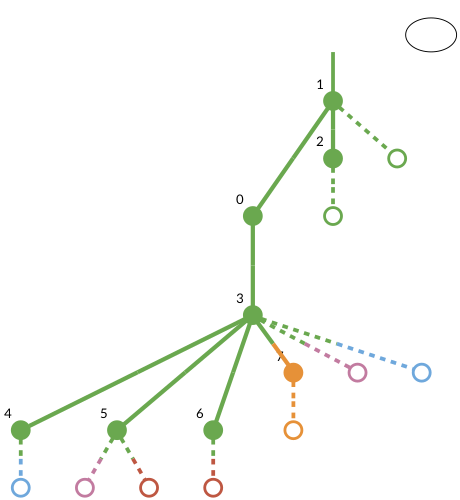

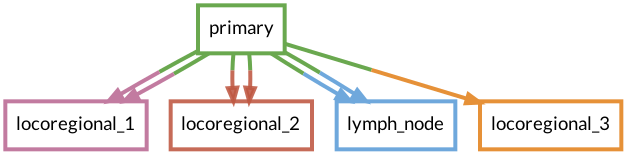

----------------------------------------------------------------------------------------------------



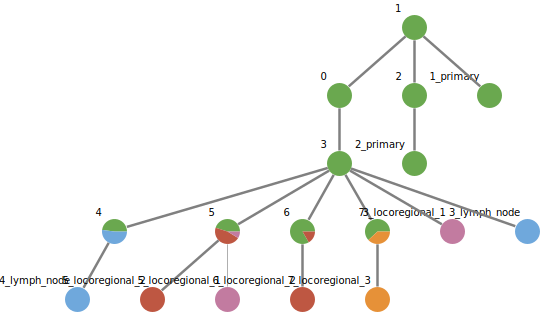

In [6]:
# Patient E
patient = "E"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'purple', 'darkorange', 'royalblue', 'red', ]]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

num trees: 1
['primary', 'lymph_node', 'locoregional', 'distant']


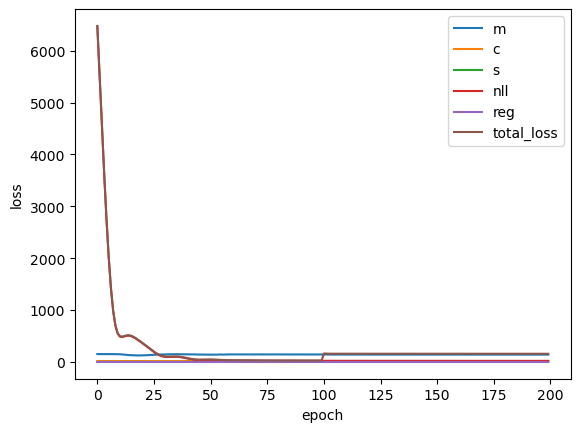

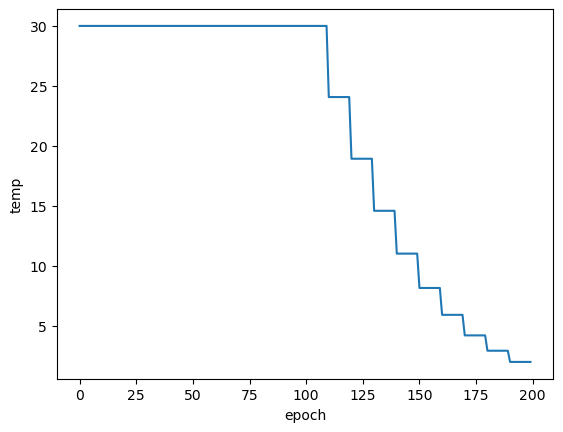

Time elapsed: 22.85736
**************************************** BEST TREE LABELING ****************************************

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 17.857
Reg: 4.0
Loss: 171.857


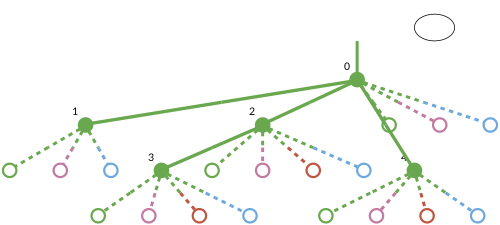

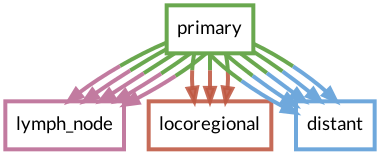

----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 17.874
Reg: 4.0
Loss: 171.874


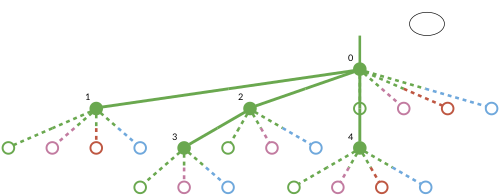

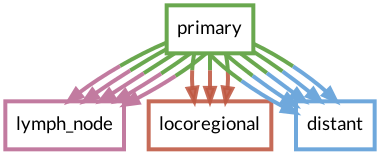

----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 18.882
Reg: 4.000000476837158
Loss: 172.882


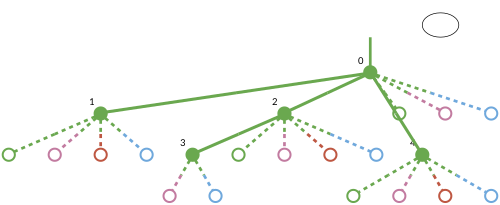

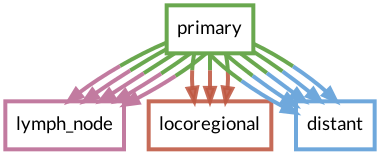

----------------------------------------------------------------------------------------------------

Migration number: 13.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 21.134
Reg: 4.0
Loss: 175.134


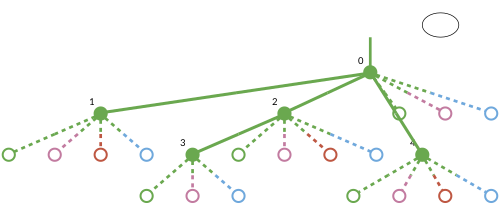

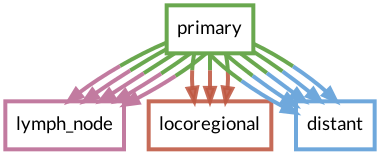

----------------------------------------------------------------------------------------------------

Migration number: 14.0
Comigration number: 3.0
Seeding site number: 1.0
Neg log likelihood: 18.715
Reg: 3.999999761581421
Loss: 182.715


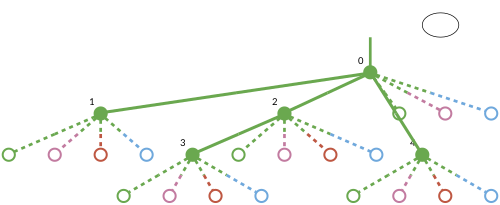

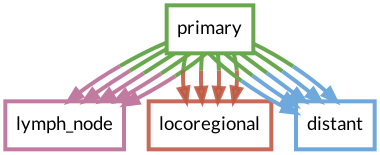

----------------------------------------------------------------------------------------------------



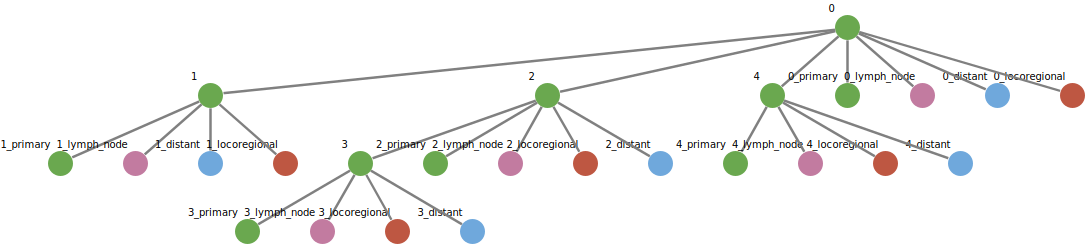

In [7]:
# Patient F
patient = "F"
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'darkorange', 'hotpink']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), custom_colors)

